# **Steam - Game Recommender**

---
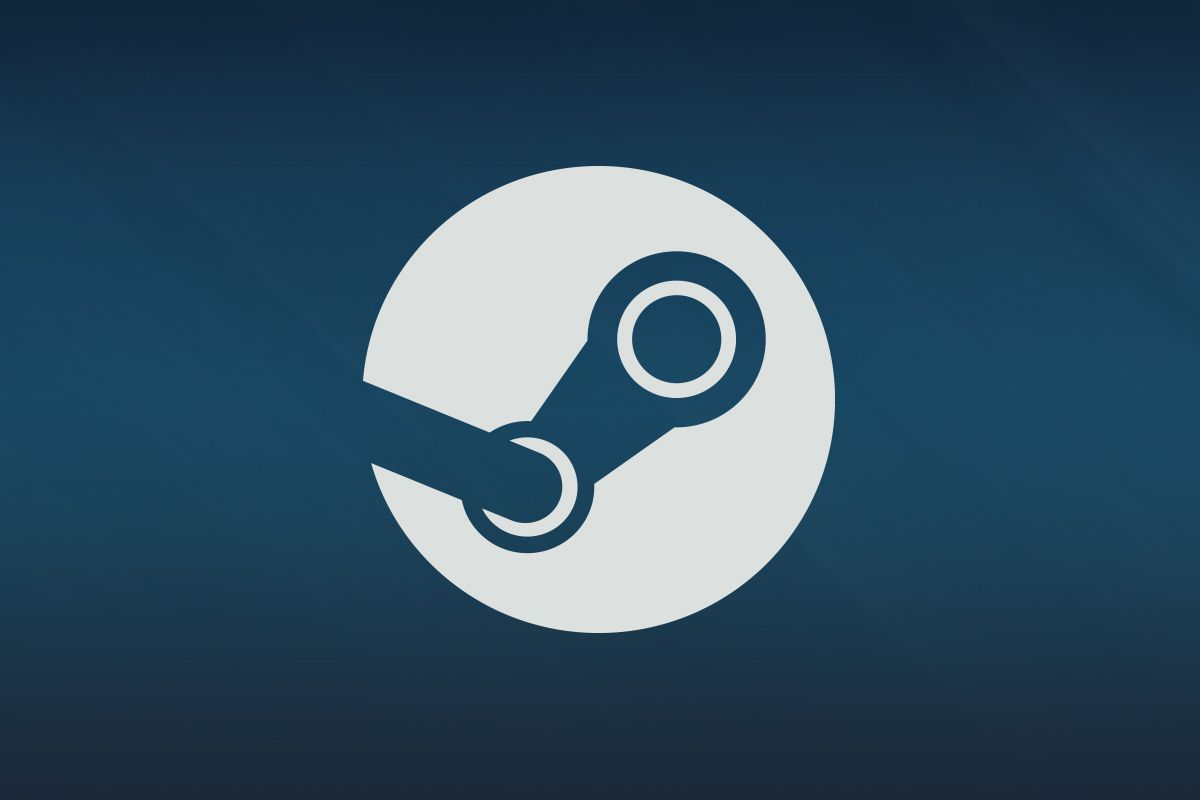

# About Dataset

- What is Steam ?
  
  Steam is the world's most popular PC Gaming hub, with over 6,000 games and a community of millions of gamers. With a massive collection that includes everything from AAA blockbusters to small indie titles, great discovery tools are a highly valuable asset for Steam.

- Dataset:  

  This dataset has 200,000 rows and 5 columns. It covers 5,000 games and 100,000 users. You can use this dataset to analyze the user behavior, preferences, and ratings of the games on Steam, and to build a game recommender system based on collaborative filtering, content-based filtering, or hybrid methods


# Read Data

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/steam-200k.csv'
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/steam-200k.csv')

# To see the first and the last 5 values of DataFrame
df_playlist = pd.read_csv(file_path,
                          error_bad_lines=False,
                          warn_bad_lines=False,
                         )
df_playlist

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-1-63a09ccf18a8>:12: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_playlist = pd.read_csv(file_path,
<ipython-input-1-63a09ccf18a8>:12: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_playlist = pd.read_csv(file_path,


,User ID,Game,Behavior,Hoursplayed,Unnamed: 4
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0
...,...,...,...,...,...
199995,128470551,Titan Souls,play,1.5,0
199996,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199997,128470551,Grand Theft Auto Vice City,play,1.5,0
199998,128470551,RUSH,purchase,1.0,0


In [2]:
num_rows, num_colums = data.shape # Show the number of rows and columns in the DataFrame
print(f"Số dòng của dữ liệu: {num_rows}")
print(f"Số cột của dữ liệu: {num_colums}")

Số dòng của dữ liệu: 200000
Số cột của dữ liệu: 5


# Variable Types (Info)

In [3]:
data.info()
# To display the data type information of a value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   User ID      200000 non-null  int64  
 1   Game         200000 non-null  object 
 2   Behavior     200000 non-null  object 
 3   Hoursplayed  200000 non-null  float64
 4   Unnamed: 4   200000 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.6+ MB


In [4]:
column_data_types = data.dtypes # Retrieve information about the data type of each column.
print(column_data_types)

User ID          int64
Game            object
Behavior        object
Hoursplayed    float64
Unnamed: 4       int64
dtype: object


In [5]:
data.describe() .T


,count,mean,std,min,25%,50%,75%,max
User ID,200000.0,1.036559e+08,7.208074e+07,5250.0,47384202.0,86912006.0,154230933.0,309903146.0
Hoursplayed,200000.0,1.787438e+01,1.380570e+02,0.1,1.0,1.0,1.3,11754.0
Unnamed: 4,200000.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0


### This data includes:

**User ID (*int64*)**: Integer representing the player's ID.

**Game (*object*)**: String containing the name of the game the player participated in.

**Behavior (*object*)**: String containing information about the player's behavior.

**Hoursplayed (*float64*)**: Floating-point number representing the number of hours the player played the game.

**Unnamed: 4 (*int64*)**: An integer column, seemingly not clearly named.







# Data preproccessing

## Remove unnecessary columns

In [6]:
# Remove unnecessary or erroneous columns, and print the updated data table.
data = data.drop('Unnamed: 4', axis=1)
print(data)

          User ID                        Game  Behavior  Hoursplayed
0       151603712  The Elder Scrolls V Skyrim  purchase          1.0
1       151603712  The Elder Scrolls V Skyrim      play        273.0
2       151603712                   Fallout 4  purchase          1.0
3       151603712                   Fallout 4      play         87.0
4       151603712                       Spore  purchase          1.0
...           ...                         ...       ...          ...
199995  128470551                 Titan Souls      play          1.5
199996  128470551  Grand Theft Auto Vice City  purchase          1.0
199997  128470551  Grand Theft Auto Vice City      play          1.5
199998  128470551                        RUSH  purchase          1.0
199999  128470551                        RUSH      play          1.4

[200000 rows x 4 columns]


## Checking for missing values

In [7]:
# Checking
missing_values = data.isnull().sum()
missing_values


User ID        0
Game           0
Behavior       0
Hoursplayed    0
dtype: int64

### There are no missing values in the dataset, so we can proceed with the analysis without the need for imputation.

In [8]:
# Count the occurrences of each game (Sort alphabetically)
total_game = data.groupby('Game')['Game'].agg('count')
total_game

Game
007 Legends                                                     2
0RBITALIS                                                       6
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby)     12
10 Second Ninja                                                 8
10,000,000                                                      2
                                                             ... 
sZone-Online                                                  160
samurai_jazz                                                    1
the static speaks my name                                      21
theHunter                                                     372
theHunter Primal                                                8
Name: Game, Length: 5155, dtype: int64

In [9]:
# Count the number of Play and Purchase.
total_purchase = data.groupby('Behavior')['Behavior'].agg('count')
total_purchase

Behavior
play         70489
purchase    129511
Name: Behavior, dtype: int64

# Data Loading and Exploration



## What are the Top 10 most purchased / installed games of this sample?

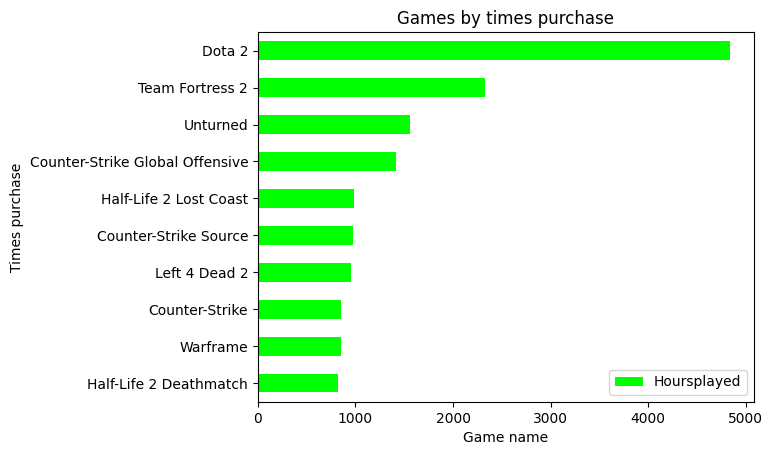

In [10]:
data[data['Behavior'] == 'purchase'][['Game','Hoursplayed']].groupby('Game').sum().sort_values(by = 'Hoursplayed', ascending = True).tail(10).plot(kind = 'barh', cmap = 'brg_r', grid = False)

plt.title('Games by times purchase')
plt.xlabel('Game name')
plt.ylabel('Times purchase');

As we can see in this sample games like Dota 2, TF2, Unturned and CS:GO are leading. But these games are mostly ***free***, this is because the sample counts the times a game got downloaded.

## What are the top 10 most played games of this sample? (By HoursPlayed)

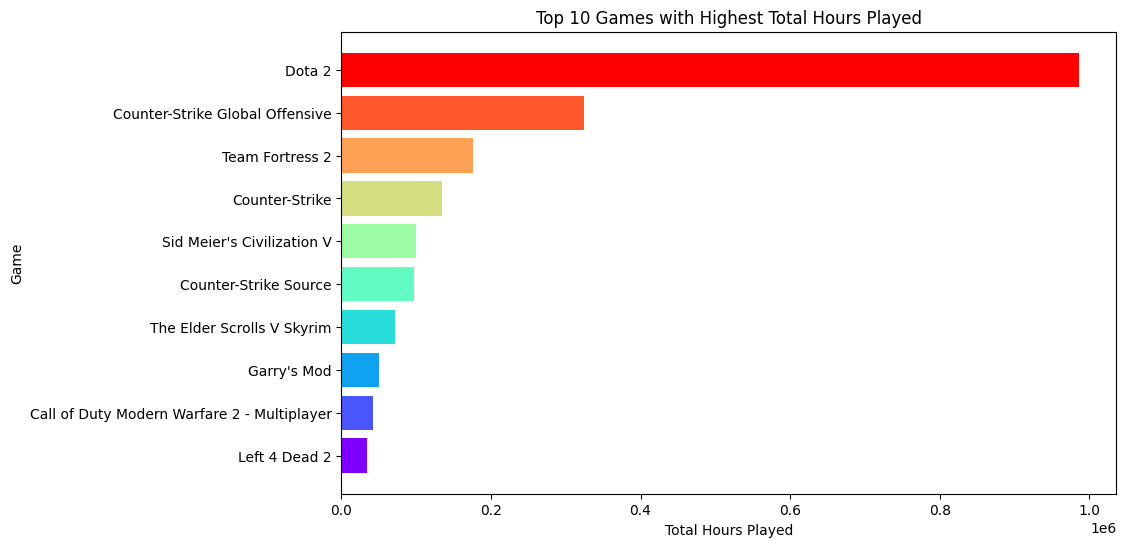

In [11]:
sorted_data = data.groupby('Game')['Hoursplayed'].sum().sort_values(ascending=True)

# Chose top 10 games.
top_games = sorted_data.tail(10)

colors = plt.cm.rainbow(np.linspace(0, 1, len(top_games)))

# Draw a horizontal bar chart.
plt.figure(figsize=(10, 6))
plt.barh(top_games.index, top_games.values, color=colors)
plt.title('Top 10 Games with Highest Total Hours Played')
plt.xlabel('Total Hours Played')
plt.ylabel('Game')
plt.show()


In [12]:
data[data['Behavior'] == 'play'][['Game','Hoursplayed']].groupby('Game').sum().sort_values(by = 'Hoursplayed', ascending = False).head(10)

,Hoursplayed
Game,
Dota 2,981684.6
Counter-Strike Global Offensive,322771.6
Team Fortress 2,173673.3
Counter-Strike,134261.1
Sid Meier's Civilization V,99821.3
Counter-Strike Source,96075.5
The Elder Scrolls V Skyrim,70889.3
Garry's Mod,49725.3
Call of Duty Modern Warfare 2 - Multiplayer,42009.9


As we can see that the game Dota 2 takes up a significant amount of playtime. Being a MOBA game, it's understandable that the repetitive nature of playing multiple matches contributes to a noticeable difference in playtime compared to other games and it triples the time of the second most played (CS:GO)

## Top 10 game has the highest number of players? (By Number of players)

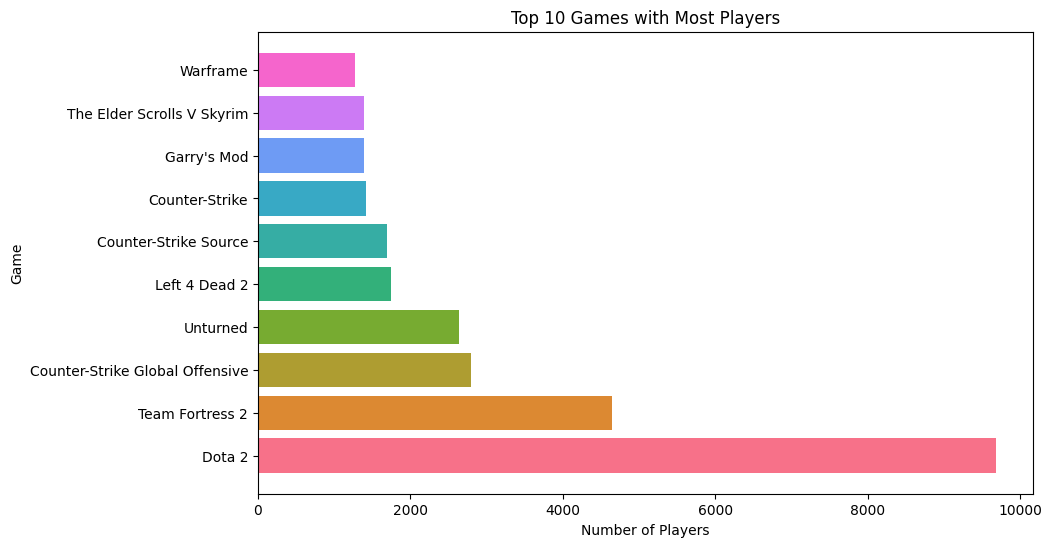

In [13]:
top_games = data['Game'].value_counts().nlargest(10)

rainbow_palette = sns.color_palette("husl", 10)
plt.figure(figsize=(10, 6))
bars = plt.barh(top_games.index, top_games.values, color=rainbow_palette)

plt.title('Top 10 Games with Most Players')
plt.xlabel('Number of Players')
plt.ylabel('Game')
plt.show()

Here, we can see that the top game is DOTA 2 with a total of over 9000 Players, followed by Team Fortress 2 and CSGO. The top 3 games are all Online Esport games. So, due to high competitiveness in these games, there are always players continuously playing at any given time.

## What games does the user with more purchases in the sample plays?

In [14]:
print('Top 3 User with more purchases in the sample plays')
pd.DataFrame(data[data['Behavior'] == 'purchase']['User ID'].value_counts().head(3))

Top 3 User with more purchases in the sample plays


,User ID
62990992,1075
33865373,783
30246419,766


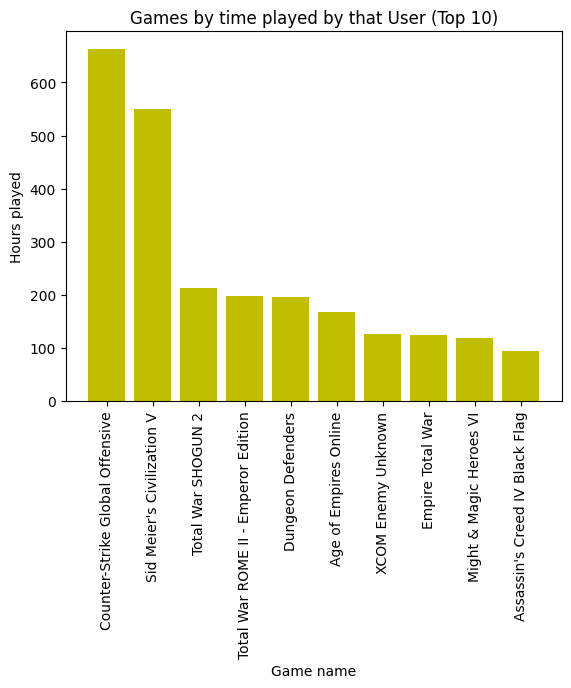

In [15]:
plt.bar(data[(data['User ID'] == 62990992) & (data['Hoursplayed'] != 1)][['Game','Hoursplayed']].head(10)['Game'],data[(data['User ID'] == 62990992) & (data['Hoursplayed'] != 1)][['Game','Hoursplayed']].head(10)['Hoursplayed'],
       color = 'y')

plt.xticks(rotation=90)
plt.ylabel('Hours played')
plt.xlabel('Game name')
plt.title('Games by time played by that User (Top 10)')
plt.grid(False);

The user with more purchases has **1075 games** purchased / installed. And that user plays CS:GO the most with **over 600 hours** followed by SidV with **over 500 hours**.

# Several other charts:

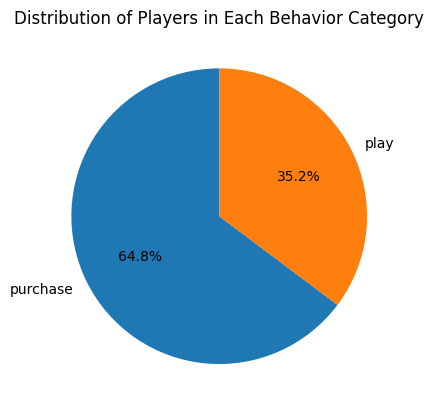

In [16]:
plt.pie(data['Behavior'].value_counts(), labels=data['Behavior'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Players in Each Behavior Category')
plt.show()


The percentage above indicates that the **Purchase** behavior of users is higher than the percentage of **Play**, suggesting that many people buy games but play them rarely (*almost never*)

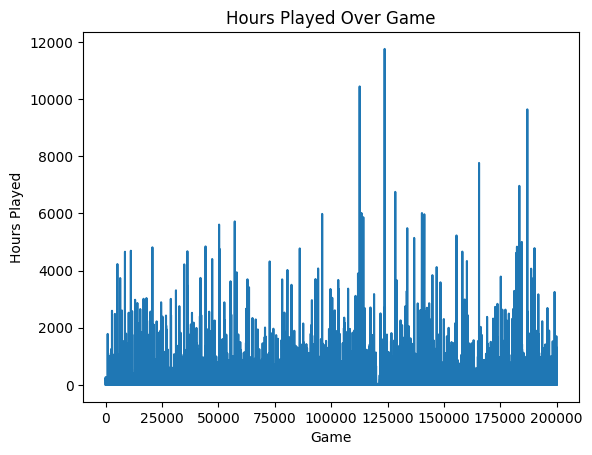

In [17]:
data["Hoursplayed"].plot()
plt.title('Hours Played Over Game')
plt.xlabel('Game')
plt.ylabel('Hours Played')
plt.show()


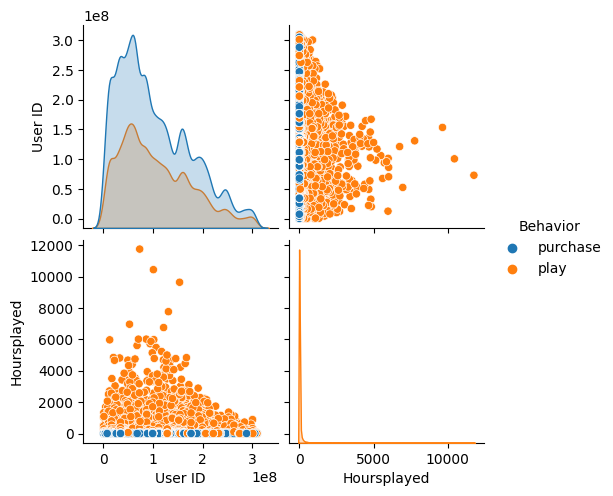

In [18]:
sns.pairplot(data, hue="Behavior");